In [1]:
import random

import tensorflow as tf
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay


from extract_data import get_dataset

In [2]:
dataset = get_dataset()
x_data, y_data = dataset

/opt/anaconda3/envs/cocrystal/lib/python3.12/site-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/opt/anaconda3/envs/cocrystal/lib/python3.12/site-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
Either api or coformer not found. API= 1,2,4-thiadiazole derivative . Coformer= Vanillic acid
Either api or coformer not found. API= 4-cyanophenol . Coformer= 1,2-bis(4-dipyridyl)ethane
Either api or coformer not found. API= 4-cyanophenol . Coformer= trans-1,2-bis(4-dipyridyl)ethylene
Either api or coformer not found. API= bicalutamide . Coformer= trans-1,2-bis(4-dipyridyl)ethylene
Either api or coformer not found. API= Flurbiprofen . Coformer= 4,4'-ethylenebipyridine
Either api or coformer not found. API= Ibuprofen . Coformer= 4,4'-ethylenbipyridine
Either api or coformer not found. API= 3-cyanopyridin

In [3]:
n_components = 200
epochs=200
neurons_in_hidden_layer = 50

In [15]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(x_data.iloc[:,:-2])

pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(scaled_data)

x_data_values = principal_components

y_data_values = y_data.iloc[:,:1]

np.random.seed(60)
shuffled_indices = random.sample(range(x_data_values.shape[0]),x_data_values.shape[0])
test_size = 0.2
train_cursor = int(np.floor((1-test_size)*(x_data_values.shape[0])))
train_indices = shuffled_indices[:train_cursor]
test_indices = shuffled_indices[train_cursor:]

x_train = pd.DataFrame(x_data_values[train_indices,:])
y_train = y_data_values.iloc[train_indices,:]

x_test = pd.DataFrame(x_data_values[test_indices,:])
y_test = y_data_values.iloc[test_indices,:]

In [5]:
number_of_input_neurons = x_train.shape[1]

model = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(input_shape=(number_of_input_neurons,)),
    tf.keras.layers.Dense(neurons_in_hidden_layer, activation = 'sigmoid'),
    tf.keras.layers.Dense(neurons_in_hidden_layer, activation = 'sigmoid'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 'precision', 'recall'])

# early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', 
#                                patience=10,  # Number of epochs with no improvement after which training will be stopped
#                                restore_best_weights=True,  # Restore model weights from the epoch with the best validation loss
#                                mode='min')  # 'min' to stop when the monitored metric decreases
# history = model.fit(x_train,y_train,epochs=epochs, validation_split = 0.2, callbacks=[early_stopping])
# model.save('models/ann.keras')

model = tf.keras.models.load_model('models/ann.keras')

/opt/anaconda3/envs/cocrystal/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [16]:
loss, accuracy, precision, recall = model.evaluate(x_test, y_test)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8234 - loss: 0.4360 - precision: 0.8323 - recall: 0.8073 


In [17]:
y_pred = model.predict(x_test)
y_pred[y_pred>=0.5] = 1
y_pred[y_pred<0.5] = 0

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 833us/step


In [18]:
r = 10

f1_score = 2*(precision*recall)/(precision+recall)

print("Accuracy:", round(accuracy,r))
print("Precision:", round(precision,r))
print("Recall:", round(recall,r))
print("F1-Score:", round(f1_score,r))
print(classification_report(y_test, y_pred))

Accuracy: 0.8044354916
Precision: 0.8181818128
Recall: 0.788844645
F1-Score: 0.8032454457
              precision    recall  f1-score   support

           0       0.79      0.82      0.81       245
           1       0.82      0.79      0.80       251

    accuracy                           0.80       496
   macro avg       0.80      0.80      0.80       496
weighted avg       0.80      0.80      0.80       496



Confusion Matrix:
[[205  58]
 [ 48 185]]


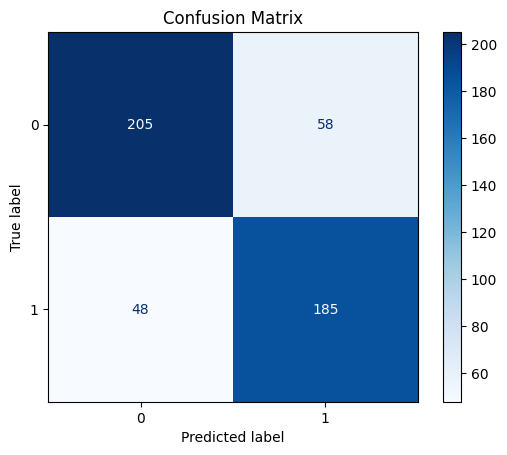

In [25]:
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()